# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [1]:
%pip install tensorflow-datasets
%pip install matplotlib
%pip install scipy 
%pip install tensorflow-hub

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow-datasets from https://files.pythonhosted.org/packages/43/e6/a85c9a2d8ce72c09c8c8bf231c75e6e12e0e0848df336b28d1ec0beae1fe/tensorflow_datasets-4.9.7-py3-none-any.whl.metadata
  Obtaining dependency information for dm-tree from https://files.pythonhosted.org/packages/e8/46/939fbf81177c7cb3b1e5ddebd696237b3be9520769cce882f064de497103/dm_tree-0.1.9-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for immutabledict from https://files.pythonhosted.org/packages/59/56/25ca7b848164b7d93dbd5fc97dd7751700c93e324fe854afbeb562ee2f98/immutabledict-4.2.1-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for pyarrow from https://files.pythonhosted.org/packages/b8/39/a2a6714b471c000e6dd6af4495dce00d7d1332351b8e3170dfb9f91dad1f/pyarrow-19.0.0-cp311-cp311-manylinux_2_28_x86_6

In [2]:
# TODO: Make all necessary imports.

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

2025-02-17 14:53:02.275159: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-17 14:53:02.275207: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-17 14:53:02.275252: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-17 14:53:02.284431: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [3]:
# TODO: Load the dataset with TensorFlow Datasets.
dataset, dataset_info = tfds.load("oxford_flowers102", as_supervised=True, with_info=True)

# TODO: Create a training set, a validation set and a test set.

train_dataset = dataset["train"]
val_dataset = dataset["validation"]
test_dataset = dataset["test"]

/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 3/3 [01:41<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/3 [01:42<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/3 [01:43<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/3 [01:44<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/3 [01:46<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/3 [01:47<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/3 [01:48<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/3 [01:49<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/3 [01:50<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/3 [01:51<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/3 [01:52<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/3 [01:53<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/3 [01:54<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/3 [01:55<00:00,  7.96s/ url]

Dl Completed...: 100%|██████████| 3/

Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


## Explore the Dataset

In [4]:
# TODO: Get the number of examples in each set from the dataset info.

num_train_examples = dataset_info.splits["train"].num_examples

num_validation_examples = dataset_info.splits["validation"].num_examples

num_test_examples = dataset_info.splits["test"].num_examples

print("number of train examples :", num_train_examples)
print("number of validation examples :", num_train_examples)
print("number of test examples :", num_test_examples)

# TODO: Get the number of classes in the dataset from the dataset info.

num_classes = dataset_info.features['label'].num_classes

print("\nnumber of classes in the dataset :", num_classes)


number of train examples : 1020
number of validation examples : 1020
number of test examples : 6149

number of classes in the dataset : 102


Image 1:
 Shape: (655, 500, 3)
 Label: 7 



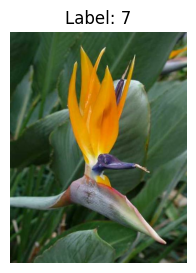

Image 2:
 Shape: (500, 667, 3)
 Label: 20 



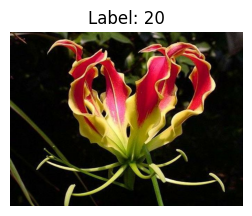

Image 3:
 Shape: (505, 500, 3)
 Label: 31 



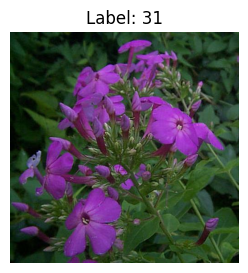

In [5]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
random_images = train_dataset.shuffle(1000).take(3) #to pick random 3 images almost ecah time

for i, (image, label) in enumerate(random_images):
    print(f"Image {i+1}:")
    print(f" Shape: {image.shape}")
    print(f" Label: {label.numpy()} \n")
    # to display the image each time (i think it will look more cool with this)
    # note that i add this after doing the next todoy since it almost the smae thing
    plt.figure(figsize=(3,3)) # make it smaller a liitle than the next TODO
    plt.imshow(image.numpy())  
    plt.axis("off")
    plt.title(f"Label: {label.numpy()}")
    plt.show()

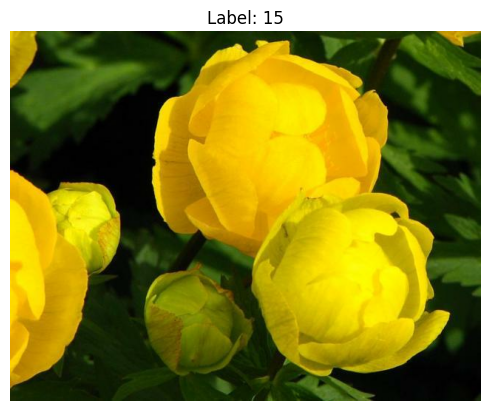

In [6]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
random_images = train_dataset.shuffle(100).take(1) #above i put it 1000 but it take longer time so since here only one i make it less

for image, label in random_images:
    plt.imshow(image)
    plt.title(f"Label: {label.numpy()}")
    plt.axis("off")
    plt.show()

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [8]:
import json
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

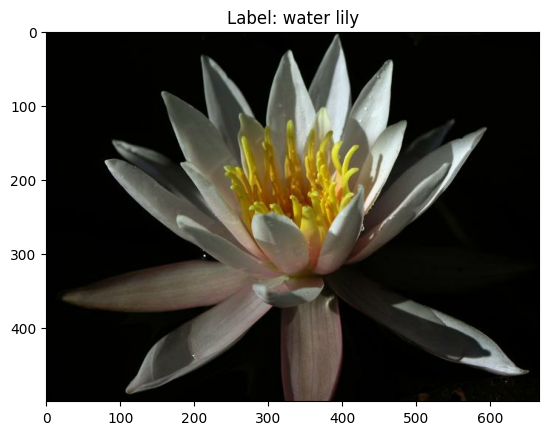

In [9]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
class_names = dataset_info.features["label"].names

for image, label in train_dataset.take(1):
    plt.imshow(image)
    plt.title(f"Label: {class_names[label.numpy()]}")

## Create Pipeline

In [10]:
# TODO: Create a pipeline for each set.

# define preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Create the pipeline for each dataset (train, validation, test)
batch_size = 32

train_pipeline = train_dataset.map(preprocess).shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
validation_pipeline = val_dataset.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_pipeline = test_dataset.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [11]:
# TODO: Build and train your network.

import tensorflow_hub as hub

mobile_net_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# building the model using KerasLayer directly

model = tf.keras.Sequential([
    hub.KerasLayer(mobile_net_url, trainable=False),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(dataset_info.features["label"].num_classes, activation="softmax")])


# compile the model

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


# train the model

history = model.fit(train_pipeline, epochs=5, validation_data=validation_pipeline)

Epoch 1/5
32/32 [==============================] - 142s 4s/step - loss: 4.2872 - accuracy: 0.1196 - val_loss: 2.8224 - val_accuracy: 0.4873
Epoch 2/5
32/32 [==============================] - 135s 4s/step - loss: 1.9885 - accuracy: 0.5441 - val_loss: 1.6273 - val_accuracy: 0.6353
Epoch 3/5
32/32 [==============================] - 136s 4s/step - loss: 1.0654 - accuracy: 0.7353 - val_loss: 1.2352 - val_accuracy: 0.7000
Epoch 4/5
32/32 [==============================] - 125s 4s/step - loss: 0.5593 - accuracy: 0.8735 - val_loss: 1.0021 - val_accuracy: 0.7510
Epoch 5/5
32/32 [==============================] - 127s 4s/step - loss: 0.3643 - accuracy: 0.9196 - val_loss: 0.8825 - val_accuracy: 0.7637


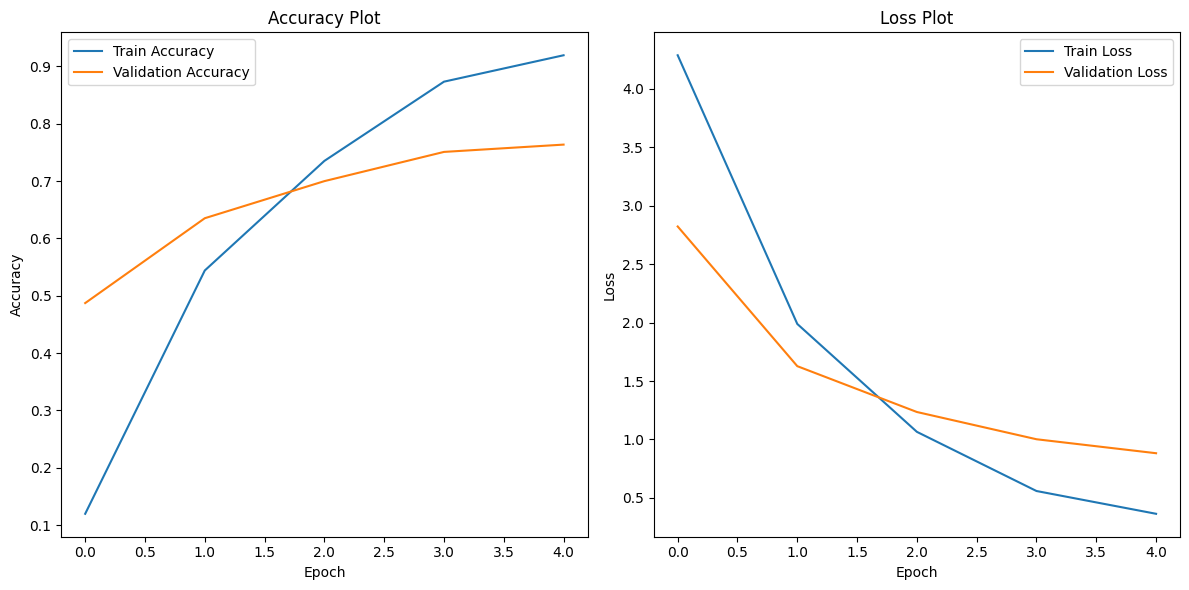

In [12]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.

plt.figure(figsize=(12, 6))

# Accuracy plot

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [13]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

test_loss, test_accuracy = model.evaluate(test_pipeline)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

193/193 [==============================] - 393s 2s/step - loss: 1.0193 - accuracy: 0.7427
Test Loss: 1.0193495750427246
Test Accuracy: 0.7427223920822144


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [14]:
# TODO: Save your trained model as a Keras model.

model.save("flower_classifier.keras")

## Load the Keras Model

Load the Keras model you saved above.

In [15]:
# TODO: Load the Keras model

loaded_model = tf.keras.models.load_model(
    "flower_classifier.keras",
    custom_objects={'KerasLayer': hub.KerasLayer})


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [16]:
# TODO: Create the process_image function

from PIL import Image

def process_image(image_path):
    # Load image
    image = Image.open(image_path)
    
    # Convert to Numpy array
    image_array = np.asarray(image)
    
    # Convert NumPy array to a TensorFlow
    image_tensor = tf.convert_to_tensor(image_array)
    
    # Resize images to 244x244 
    resized_image = tf.image.resize(image_tensor, (224, 224))

    
    # Normalize pixel values to [0,1]
    normalized_image = resized_image / 255.0  

    processed_image = normalized_image.numpy()
    
    return processed_image

To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

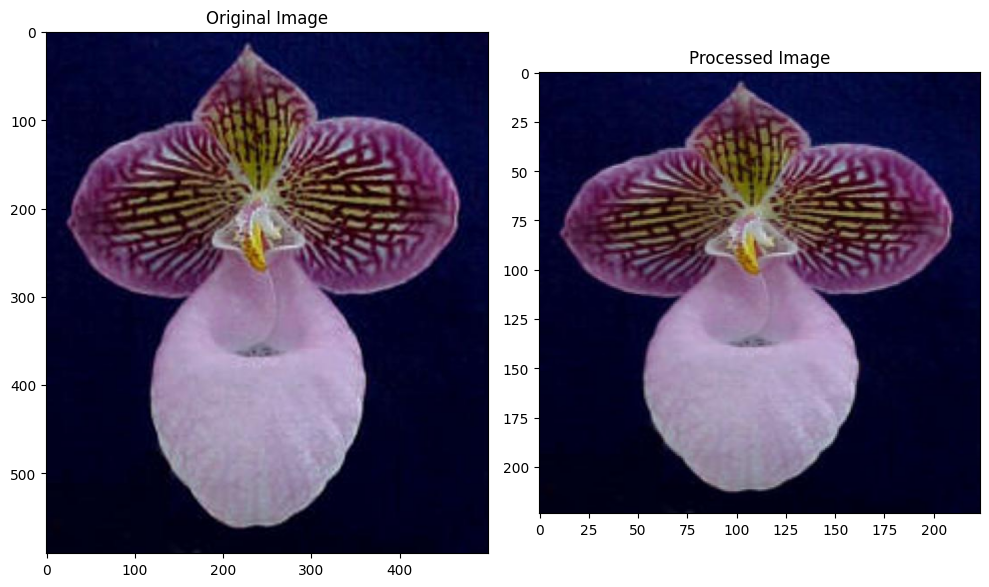

In [17]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(image_path)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [18]:
# TODO: Create the predict function

def predict(image_path, model, top_k):
    # Load and process image
    processed_image = process_image(image_path)
    
    # Expand dimensions to match model input shape (1, 224, 224, 3)
    expand_image = np.expand_dims(processed_image, axis=0)
    
    # Get predictions
    predictions = model.predict(expand_image)
    
    # Get top K probabilities and class indices
    top_k_probs, top_k_classes = tf.math.top_k(predictions, k=top_k)
     
    # Convert TensorFlow tensors to NumPy arrays
    probs = top_k_probs.numpy()[0]  # Extract values from batch
    classes = top_k_classes.numpy()[0].astype(str)  # Convert class indices to strings

    
    return probs, classes

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 0s 398ms/step


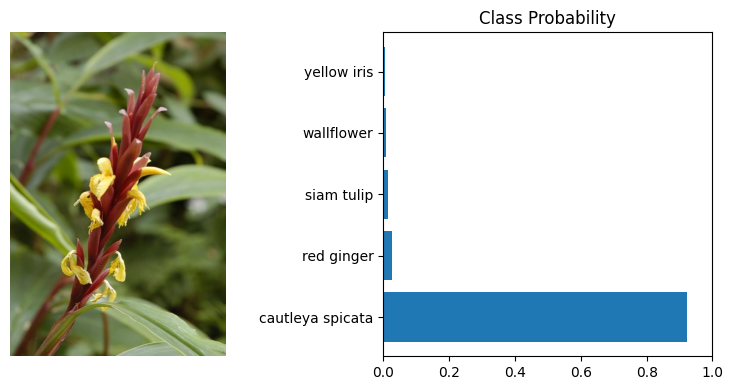

In [19]:
# TODO: Plot the input image along with the top 5 classes
def plot_predictions(image_path, model, class_names, top_k=5):
    
    # Get predictions
    probs, classes = predict(image_path, model, top_k)
    
    # Convert class indices to names
    class_labels = [class_names[int(cls)] for cls in classes]  
    
    # Load and display the image
    image = Image.open(image_path)

    # Create the figure
    fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)
    
    # Show the image
    ax1.imshow(image)
    ax1.axis('off')

    # Show the bar chart
    y_pos = np.arange(len(class_labels))
    ax2.barh(y_pos, probs, align='center')
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(class_labels)
    ax2.set_xlim(0, 1)
    ax2.set_title("Class Probability")

    plt.tight_layout()
    plt.show()
    
    
plot_predictions('./test_images/cautleya_spicata.jpg', loaded_model, class_names, top_k=5)